# NumPy

計算社会科学の研究は、テキスト、画像、ビデオや数値測定結果など幅広いデータセットとソースを扱っています。

形式に違いがあるにも関わらず、基本的に全てのデータは数値の配列として扱うのに適しています。

- テキストデータは文字のシーケンスであり、それぞれの文字には数値の表現があります（通常はUnicode）。テキスト処理や自然言語処理のために、テキストデータは数値の配列として表現されることがあります。一般的な手法には、文字を数値にエンコードする方法（例：ASCII、UTF-8）、単語や文字の出現頻度を数える方法、単語の埋め込み（Word2Vec、GloVe）などがあります。
- 画像は、各ピクセルに対して数値の輝度や色情報が割り当てられています。カラー画像の場合、各ピクセルはRGB（赤、緑、青）の値で表され、グレースケール画像の場合は単一の輝度値で表されます。

![](https://nbviewer.org/github/fastai/numerical-linear-algebra/blob/master/nbs/images/digit.gif)

どのようなデータであっても、それらを分析可能にする最初のステップは、数値の配列に変換することです。

このため、数値配列の効率的な格納と操作は、データ分析にとって欠かせない要素です。

```NumPy```は、多次元配列や行列演算を効率的に処理する機能を提供し、科学技術計算やデータ解析に広く利用されています。

In [1]:
import numpy as np
print(np.__version__)

1.23.5


## NumPy配列の作成

### Pythonリストから作る配列

```np.array```を使って、PythonリストからNumPy配列（```ndarray```）を作成します。

```{margin}
NumPy配列とPythonの組み込みリストと似ていますが、NumPy配列はより効率的な格納とデータ操作を提供しています。
```

In [2]:
np.array([1, 2, 3, 4, 5, 6])

array([1, 2, 3, 4, 5, 6])

Pythonリストとは異なり、NumPy配列の要素は全て同じ型という制約がります。作成する際、型が一致しない場合、可能であればNumPyは自動的に調整してくれます。

In [3]:
np.array([1, 2, 3.14, 4, 5, 6]) # upcasting: all elements are converted to float

array([1.  , 2.  , 3.14, 4.  , 5.  , 6.  ])

```dtype```キーワードで配列のデータ型を明示的に設定できます。

In [4]:
np.array([1, 2, 3, 4, 5, 6],dtype='float32') # specify data type

array([1., 2., 3., 4., 5., 6.], dtype=float32)

### 配列の構築

```NumPy```の組み込み関数で配列を作成できます。

In [5]:
np.zeros(10, dtype=int) # create an array of 10 zeros

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
np.ones((3, 5), dtype=float) # create a 3x5 array of floating-point ones

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [7]:
np.full((3, 5), 3.14) # create a 3x5 array filled with 3.14

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [8]:
np.arange(0, 20, 2) # create an array filled with a linear sequence

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [9]:
np.linspace(0, 1, 5) # create an array of five values evenly spaced between 0 and 1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [10]:
np.eye(3) # create a 3x3 identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

```NumPy```は、様々な種類の確率分布関数に基づく乱数値を生成できます。

In [11]:
np.random.random((3, 3)) # create a 3x3 array of uniformly distributed random values between 0 and 1

array([[0.25399713, 0.0188279 , 0.69803355],
       [0.33854689, 0.16082399, 0.26025977],
       [0.90031241, 0.45019271, 0.30572706]])

In [12]:
np.random.normal(0, 1, (3, 3)) # create a 3x3 array of normally distributed random values with mean 0 and standard deviation 1

array([[ 0.61604183,  1.45260178,  0.88723647],
       [-0.94367367, -2.19620823,  0.46353941],
       [-1.43604097,  0.38312771,  0.16748036]])

In [13]:
np.random.randint(0, 10, (3, 3)) # create a 3x3 array of random integers in the interval [0, 10)

array([[4, 1, 2],
       [7, 6, 8],
       [7, 9, 8]])

```{note}
配列作成方法の一覧は、[公式チュートリアル](https://numpy.org/doc/stable/reference/routines.array-creation.html)を参照してください。
```

## NumPy配列の属性

In [14]:
import numpy as np
np.random.seed(0) # seed for reproducibility
x1 = np.random.randint(10, size=6) # one-dimensional array
x2 = np.random.randint(10, size=(3, 4)) # two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5)) # three-dimensional array

NumPy配列には、ndim(次元数)、shape(各次元のサイズ)、size(配列の合計サイズ)、dtype(配列のデータ型)などの属性を持ちます。

In [15]:
print("x3 ndim: ", x3.ndim) # number of dimensions
print("x3 shape:", x3.shape) # the size of each dimension
print("x3 size: ", x3.size) # total size of the array
print("dtype:", x3.dtype) # data type of the array

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64


配列の形状は、```reshape()``` メソッドによって変更することができます。

In [16]:
x1

array([5, 0, 3, 3, 7, 9])

In [17]:
x1.reshape((2, 3)) # reshape

array([[5, 0, 3],
       [3, 7, 9]])

## 配列のインデクス

１次元```ndarray```では、Pythonリストと同様に、$i$番目($0$から)の値にアクセスできます。

In [18]:
x1= np.array([1,2,3,4,5,6,7,8,9])

In [19]:
x1[1]

2

In [20]:
x1[3:6]

array([4, 5, 6])

```ndarray```から切り出した一部にの値を指定することができます。

Pythonのリストとは**異なって**,　```ndarray```のスライスは元の```ndarray```のビューであり、```ndarray```のコピーではないことを注意する必要があります。

つまり、スライスへの変更は、元の```ndarray```に反映されます。

In [21]:
x1_slice = x1[3:6]
x1_slice

array([4, 5, 6])

In [22]:
x1_slice[0]=12345

In [23]:
x1

array([    1,     2,     3, 12345,     5,     6,     7,     8,     9])

多次元配列では、カンマで区切ったインデクスで要素にアクセスします。

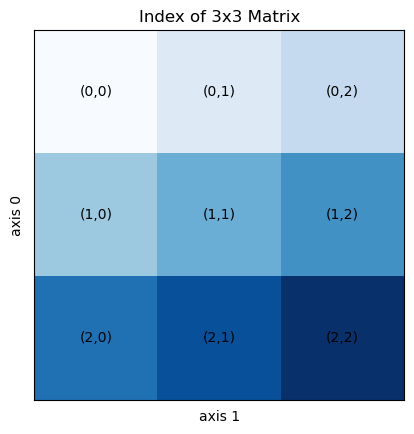

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 matrix
matrix = np.arange(9).reshape(3, 3)

# Set the background color for all cells
background_color = '#E0E0E0'  # Light gray

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap plot with the specified background color
heatmap = ax.imshow(matrix, cmap='Blues', vmin=0, vmax=8)

# Loop over each cell and add the index value as text
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(j, i, f'({i},{j})', ha='center', va='center', color='black')

# Set axis labels
ax.set_xticks(np.arange(matrix.shape[1]))
ax.set_yticks(np.arange(matrix.shape[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(length=0)
ax.set_xlabel('axis 1')
ax.set_ylabel('axis 0')

# Set the title
ax.set_title('Index of 3x3 Matrix')

# Remove the colorbar
plt.colorbar(heatmap).remove()

# Show the plot
plt.show()

In [25]:
x2= np.array([[1,2,3],[4,5,6],[7,8,9]])

In [26]:
x2[1,1]

5

In [27]:
x2[1,-1]

6

インデクスを指定し、要素の値を変更するもできます。

In [28]:
x2[1,-1]=12

In [29]:
x2

array([[ 1,  2,  3],
       [ 4,  5, 12],
       [ 7,  8,  9]])

```ndarray```における、比較演算子もベクトル演算子として定義されていますので、真偽値配列をインデックス参照として渡すことができます。

In [30]:
x2>10

array([[False, False, False],
       [False, False,  True],
       [False, False, False]])

In [31]:
x2[x2>10]=100
x2

array([[  1,   2,   3],
       [  4,   5, 100],
       [  7,   8,   9]])

## 数学演算

### 配列の算術演算

```NumPy```はベクトル演算の機能を提供しています。

- 同じサイズの```ndarray```同士の算術演算は、同位置の要素同士で計算されます。

In [32]:
arr=np.array([[1,2,3],[4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
arr*arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [34]:
arr+arr

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [35]:
arr-arr

array([[0, 0, 0],
       [0, 0, 0]])

- スカラーと```ndarray```との算術演算の場合、要素ごとに計算されます。

In [36]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [37]:
arr**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

## ユニバーサル関数: すべての要素への関数適用

ユニバーサル関数は、NumPy配列の各要素に対して要素ごとの演算を行うための関数です。これにより、繰り返し処理を書く必要なく、高速かつ効率的な計算が可能になります。

例えば、```sqrt```(平方根)```exp```（指数）を計算する:

In [38]:
arr= np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [40]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

このような引数に一つの```ndarray```を取ることから単項ufuncと呼ばれます。一方、複数な```ndarray```を引数として受け取る関数もあります。

In [41]:
x1= np.random.randint(10, size=6)
x1

array([4, 3, 4, 4, 8, 4])

In [42]:
x2= np.random.randint(10, size=6)
x2

array([3, 7, 5, 5, 0, 1])

In [43]:
np.maximum(x1,x2)

array([4, 7, 5, 5, 8, 4])

| 関数名                 | 説明                                        |
|----------------------|-------------------------------------------|
| `numpy.abs(x)`        | 配列の各要素の絶対値を計算します。                    |
| `numpy.sqrt(x)`       | 配列の各要素の平方根を計算します。                    |
| `numpy.exp(x)`        | 配列の各要素の指数関数を計算します。                    |
| `numpy.log(x)`        | 配列の各要素の自然対数を計算します。                    |
| `numpy.sin(x)`        | 配列の各要素の正弦を計算します。                       |
| `numpy.cos(x)`        | 配列の各要素の余弦を計算します。                       |
| `numpy.add(x1, x2)`   | 2つの配列の要素ごとの加算を行います。                  |
| `numpy.subtract(x1, x2)` | 2つの配列の要素ごとの減算を行います。                  |
| `numpy.multiply(x1, x2)` | 2つの配列の要素ごとの乗算を行います。                  |
| `numpy.divide(x1, x2)`   | 2つの配列の要素ごとの除算を行います。                  |
| `numpy.power(x1, x2)`    | 2つの配列の要素ごとのべき乗を計算します。               |


```{note}
[公式ドキュメンタリー](https://numpy.org/doc/stable/reference/ufuncs.html#)でユニバーサル関数一覧を確認できます。
```

````{tab-set}
```{tab-item} 実習問題
与えられた二つのサイズが (5,2) の配列の各要素は、二次元空間での位置を表しています。二つの配列における同じ行である要素で表示する点間のユークリッド距離を計算してください。
```
````

In [44]:
array1 = np.array([[1, 2],
                   [0, 4],
                   [5, 6],
                   [-2,2],
                   [3, 6]])

array2 = np.array([[6, 3],
                   [7, 0],
                   [5, 5],
                   [9, 1],
                   [5, 6]])

### 統計関数

NumPyの統計関数は、```ndarray```配列全体、あるいは特定の軸を中心とした統計処理を提供します。

いくつかの統計値を計算してみましょう。

In [45]:
arr=np.arange(20).reshape(5,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [46]:
arr.mean()

9.5

In [47]:
arr.sum()

190

```mean()```や```sum```はどの軸を中心に処理することを引数```axis```で指定することができます。
- ```axis=0```は列ごとの計算
- ```axis=1```は行ごとの計算

In [48]:
arr.mean(axis=0)

array([ 8.,  9., 10., 11.])

In [49]:
arr.sum(axis=1)

array([ 6, 22, 38, 54, 70])

| 関数名                    | 説明                                               |
|------------------------|--------------------------------------------------|
| `numpy.mean(x)`         | 配列の平均値を計算します。                                |
| `numpy.median(x)`       | 配列の中央値を計算します。                                |
| `numpy.min(x)`          | 配列の最小値を取得します。                                |
| `numpy.max(x)`          | 配列の最大値を取得します。                                |
| `numpy.sum(x)`          | 配列の要素の合計値を計算します。                            |
| `numpy.prod(x)`         | 配列の要素の積を計算します。                               |
| `numpy.std(x)`          | 配列の標準偏差を計算します。                               |
| `numpy.var(x)`          | 配列の分散を計算します。                                 |
| `numpy.percentile(x, q)` | 配列のパーセンタイル値を計算します。                           |

````{tab-set}
```{tab-item} 実習問題
- 平均5、標準偏差1の正規分布に従う乱数を生成してください。
- 生成された配列の平均と標準偏差を計算しよう。
```
````

## 行列計算

NumPyは、高度な行列計算を効率的に行うための多くの機能を提供しています。

NumPyで内積(ドット積)を計算するために関数```dot```を提供します。

```{margin}
MATLABなどの言語で*を内積として用いますが、NumPyでは対応する要素ごとを掛け合わせることを意味します。
```

In [50]:
x= np.array([[1,2,3],
             [4,5,6]])
y= np.array([[6,23],
             [-1,7],
             [8,9]])

In [51]:
x.dot(y)

array([[ 28,  64],
       [ 67, 181]])

In [52]:
np.dot(x,y)

array([[ 28,  64],
       [ 67, 181]])

標準的な行列の分解、逆、行列式の計算といった機能は[```numpy.linalg```](https://numpy.org/doc/stable/reference/routines.linalg.html)モジュールで提供されています。

In [53]:
from numpy.linalg import inv, qr

x= np.array([[1,2,3],
             [6,4,9],
             [1,12,5]])
mat= x.T.dot(x)
mat.dot(inv(mat))

array([[ 1.00000000e+00,  0.00000000e+00,  7.10542736e-15],
       [ 1.42108547e-14,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.55271368e-15,  1.00000000e+00]])

In [54]:
# Create the identity matrix
identity_matrix = np.eye(mat.shape[0])

# Check if the dot product is close to the identity matrix
if np.allclose(mat.dot(inv(mat)), identity_matrix):
    print("The dot product is equal to the identity matrix.")
else:
    print("The dot product is not equal to the identity matrix.")

The dot product is equal to the identity matrix.


| 関数名                          | 説明                                                                |
|--------------------------------|-------------------------------------------------------------------|
| `numpy.linalg.inv()`           | 行列の逆行列を計算します。                                                      |
| `numpy.linalg.det()`           | 行列の行列式を計算します。                                                      |
| `numpy.linalg.eig()`           | 行列の固有値と固有ベクトルを計算します。                                               |
| `numpy.linalg.solve()`         | 線形方程式を解きます。                                                         |
| `numpy.linalg.lstsq()`         | 最小二乗法を用いて線形方程式を解きます。                                               |
| `numpy.linalg.qr()`            | 行列のQR分解を計算します。                                                       |
| `numpy.linalg.svd()`           | 特異値分解（SVD）を計算します。                                                     |
| `numpy.linalg.matrix_power()`  | 行列のべき乗を計算します。                                                       |
| `numpy.linalg.norm()`          | ベクトルまたは行列のノルムを計算します。                                          |
| `numpy.linalg.inv()`           | 行列の逆行列を計算します。                                                      |
| `numpy.linalg.matrix_rank()`   | 行列のランクを計算します。                                                      |

````{tab-set}
```{tab-item} 実習問題
特定のベクトル($v$)を他のベクトル($u$)に射影する結果を計算しよう。
```
````

<details><summary>ヒント</summary>
射影の公式は以下になります：

$$
\text{Proj}(\mathbf{v}) = \frac{\mathbf{v} \cdot \mathbf{u}}{\|\mathbf{u}\|^2} \cdot \mathbf{u}
$$
</details>

## NumPyの応用例:線型回帰モデル

### 単回帰モデル

$n$個のデータ$(x_1,y_1),...(x_n,y_n)$が観測され、各$y_i$が

$$
y_i=\alpha +\beta x_i+u_i,\ i=1,...,n
$$

が得られます。

### 最小二乗法

最小二乗法の目標は、与えられたデータセットに対して予測された値（モデルの出力）と実際の値（データセットの出力）の差を最小化することである。

$$
h(\alpha,\beta)= \sum_{i=1}^n (y_i-\alpha-\beta x_i)^2
$$


$E[h(\alpha,\beta)]=0$から,母集団における$\alpha$と$\beta$を求めるが、これはあくまでも母集団の概念である。実際に持っているのは母集団に対応する標本であって、母集団そのもののは手に入りません。

$$
\frac{1}{n} \sum_{i=1}^n (y_i-\hat{\alpha}-\hat{\beta}x_i)=0
$$

データから得られる推定値を$\hat{\alpha}, \hat{\beta}$で定義する。

$$
\frac{1}{n} \sum_{i=1}^n (y_i-\hat{\alpha}-\hat{\beta}x_i)
\\
=\frac{1}{n} \sum_{i=1}^n (y_i)-\frac{1}{n} \sum_{i=1}^n \hat{\alpha}- \frac{1}{n} \sum_{i=1}^n \hat{\beta}x_i 
\\
=\frac{1}{n} \sum_{i=1}^n (y_i)- \hat{\alpha}- \hat{\beta} \frac{1}{n} \sum_{i=1}^n x_i
\\
= \bar{y} - \hat{\alpha} - \hat{\beta}\bar{x}
$$

ここで、$\bar{y}$は標本平均と呼ぶ。この式を切片について書き直すと、

$$\hat{\alpha}　= \bar{y}  - \hat{\beta}\bar{x}$$

この式を条件付き期待値ゼロ仮定　$E(u|x)=0$ より、

$$
\frac{1}{n} \sum_{i=1}^n x_i(y_i-\hat{\alpha}-\hat{\beta}x_i)=0
$$

に代入すると

$$
\sum_{i=1}^n x_i(y_i-(\bar{y}  - \hat{\beta}\bar{x})-\hat{\beta}x_i)=0
$$

$$
\sum_{i=1}^n x_i(y_i-\bar{y})=\hat{\beta} \sum_{i=1}^n x_i(\bar{x}-x_i)
$$

ここで、

$$
\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y}) = \sum_{i=1}^n x_i(y_i-\bar{y}) = \sum_{i=1}^n y_i(x_i-\bar{x})
$$

$$
\sum_{i=1}^n (x_i-\bar{x})^2 = \sum_{i=1}^n x_i^2-n(\bar{x})^2
$$

のため

この式から$\hat{\beta}$を解くと、

$$
\hat{\beta}=\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}=\frac{標本共分散(x_i,y_i)}{標本分散(x_i)}

$$
そして、$ \hat{\alpha} $も得られる

$$
\hat{\alpha}=\hat{y}-\hat{\beta}\bar{x}
$$

任意の推定値$\hat{\alpha},\hat{\beta}$に関して、$i$に関する当てはめる値(fitted value)を

$$
\hat{y_i}=\hat{\alpha} +\hat{\beta} x_i

$$
と定義する。

回帰直線と観測値との差

$$
\hat{u_i}=y_i-\hat{y_i}
$$

を残差(residual)といいます。

残差の二乗の和をとったもの

$$
RSS=\sum_{i=1}^n \hat{u_i}^2
$$

を残差平方和(residual sum of squares, RSS)といいます。

ここで、残差平方和を最小にするような$\hat{\alpha}$と$\hat{\beta}$を選びます。

In [55]:
import numpy as np

# サンプルデータ
# パラメータ
beta_0 = 2.5  # 切片
beta_1 = 0.8  # 傾き
n = 100  # データ数

# 説明変数を一様分布から生成
x = np.random.uniform(low=0, high=10, size=n)

# ノイズ項を標準正規分布から生成
epsilon = np.random.normal(loc=0, scale=1, size=n)

# 目的変数を生成
y = beta_0 + beta_1 * x + epsilon

In [56]:
# パラメータの推定
x_mean = np.mean(x)
y_mean = np.mean(y)

# β₁の推定
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta = numerator / denominator
print("beta: ", beta)
# β₀の推定
alpha = y_mean - beta * x_mean

print("alpha: ", alpha)

beta:  0.753327243094578
alpha:  2.7740186712020654


In [57]:
# 予測値の計算
y_pred = alpha + beta * x

# 残差の計算
residuals = y - y_pred

# 残差の合計の確認
residual_sum = np.sum(residuals)

print("残差の合計:", residual_sum)

残差の合計: -6.794564910705958e-14


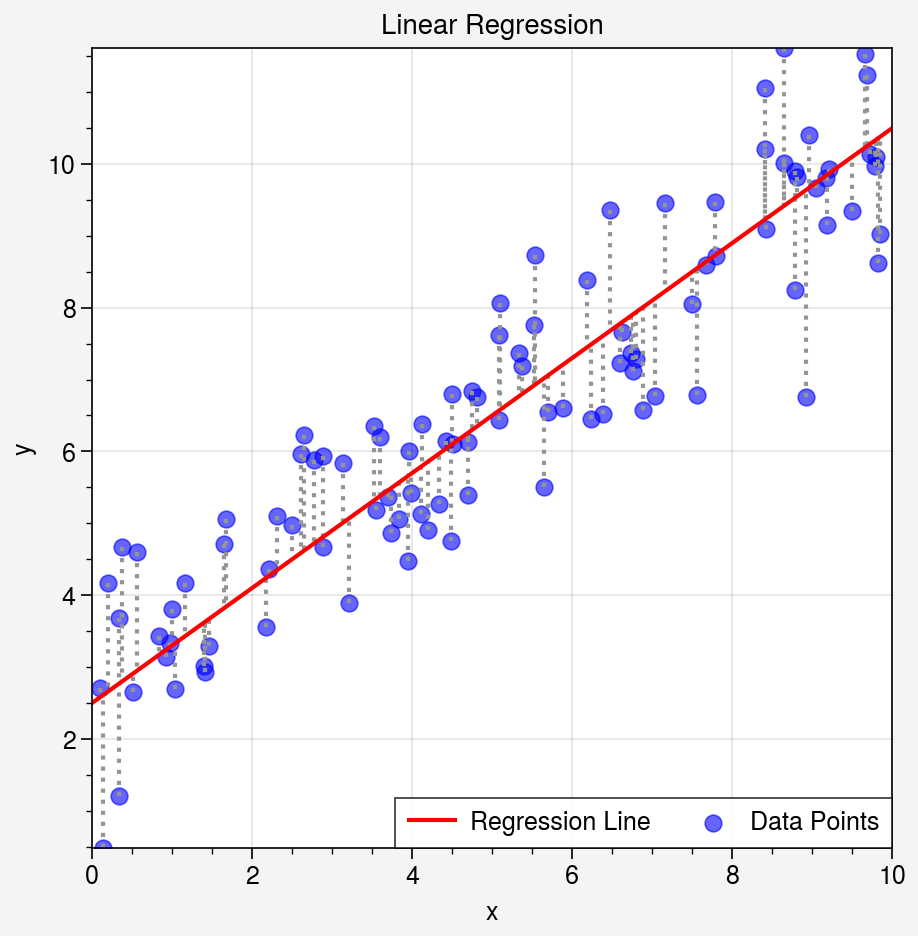

In [58]:
{
    "tags": [
        "hide-cell"
    ]
}
import numpy as np
import proplot as plt


# Creating a figure and axes
fig, ax = plt.subplots(refwidth=4)

# Scatter plot of the data points
ax.scatter(x, y, color='blue', label='Data Points',alpha=0.6)

# Regression line
x_line = np.linspace(0, 10, 100)
y_line = beta_0 + beta_1 * x_line
ax.plot(x_line, y_line, color='red', label='Regression Line')

# Vertical lines and residuals
for i in range(n):
    x_i = x[i]
    y_i = y[i]
    y_pred_i = beta_0 + beta_1 * x_i
    ax.vlines(x_i, y_i, y_pred_i, color='gray', linestyle='dotted')

# Plot settings
ax.format(xlabel='x', ylabel='y', title='Linear Regression')
ax.legend(loc="lower right")

# Display the plot
plt.show()

### 重回帰モデル

$k$個の説明変数$x_1,...,x_k$が考えられ、$y$との間に

$$
y_j=\beta_0+\beta_1 x_{1j}+...+\beta_k x_{kj}+ u_j
$$

なる線型関係が想定されます。これを重回帰モデルといいます。

$\beta_1,....,\beta_k$は偏回帰係数(partial regression coefficient)と呼びます。

重回帰モデルを行列を用いて

$$
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}= \begin{bmatrix} 
1 & x_{11} & x_{12} & \ldots & x_{1k} \\
1 & x_{21} & x_{22} & \ldots & x_{2k} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{nk} \\
\end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{bmatrix}+\begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_n \end{bmatrix}
$$

と表されます。それぞれの対応するベクトル及び行列とおくと、

$$
\mathbf{y} =\mathbf{X} \mathbf{\beta}+\mathbf{u}
$$

ここで、誤差$\mathbf{u}$について、
- 不偏性: $E(\mathbf{u})=0$
- 等分散性、無相関性: 平均ベクトル$E(\mathbf{u})=0$年、$Cov(\mathbf{u})=E[\mathbf{u} \mathbf{u}^T]=\sigma^2 \mathbf{I}$と仮定する

回帰係数ベクトル$\mathbf{\beta}$の最小二乗推定量は、

$$
h(\mathbf{\beta})=\sum_{j=1}^n [y_j-(\beta_0+\beta_{1}x_{1j}+... +\beta_k x_{kj})]^2
$$

を最小化することより得られる。

この式を行列を用いて表すと、

$$
h(\mathbf{\beta})=(\mathbf{y}-\mathbf{X}\mathbf{\beta})^T(\mathbf{y}-\mathbf{X}\mathbf{\beta})
$$


$min\ h(\mathbf{\beta})$という最小化問題を解くために、

$$
\frac{\partial}{\partial\beta} (y - X\beta)^T(y - X\beta) = \frac{\partial}{\partial\beta} (Y^TY - 2\beta^TX^TY + \beta^TX^TX\beta)= -2X^T y + 2X^T X\beta = 0
$$

を得ることができます。ここで、$X^T X\beta=X^T Y$のため、

$$
X^TX\beta = X^TY
$$

$\mathbf{X}$はフル・ランクであるとすると、$X^TX$の逆行列が存在しますので、

$$
\beta = (X^TX)^{-1}X^TY
$$